#### Import packages

In [ ]:
# import the necessary datasets
import pandas as pd # for data handling
import numpy as np # for mathematical operations
from datetime import datetime,timedelta # for working with dates
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
#style.use('seaborn-whitegrid')
import matplotlib
import pickle
import csv
#import xarray as xr

# NICE colorscheme for scientific purposes, I can recommend: https://pypi.org/project/cmcrameri/
#from cmcrameri import cm
#from cmcrameri.cm import show_cmaps 

pd.set_option('display.max_columns', 40)


#### some simple functions to make your life easier

In [ ]:
'''import Picarro file for files in normal Air mode (no 17O measurements)'''
def loadPICfile_LAB(filePIC):
    dfPIC=pd.read_csv(filePIC,index_col=(0),parse_dates=[2],skipinitialspace=True,na_values=['NAN'],dtype={'FRAC_DAYS_SINCE_JAN1': np.float64,'Picarro':str,'Port':str,'Analysis':str,'Port':str,'Sample':str})
    dfPIC.rename(inplace=True,columns={ 
            'd(D_H)Mean': 'dD',
            'ValveMask': 'Valve',
            'd(18_16)Mean':'d18',
            'd(17_16)Mean':'d17',
            'H2O_Mean':'H2O',
            'FRAC_DAYS_SINCE_JAN1':'DOY',
            'Inj Nr':'Inj',
            'Time Code':'time',
            'd(17_16)_SD':'d17sd',
            'd(18_16)_SD':'d18sd',
            'd(D_H)_SD':'dDsd'})
    # add deuterium excess to the dataframe
    dfPIC['dex']=pd.Series(data=(dfPIC.dD-8*dfPIC.d18),index=dfPIC.index)
    
    return dfPIC

''' so I dont always have to type figsize and subplots'''
def plot1(figsize=(12,6)):
    fig,ax=plt.subplots(1,1,figsize=figsize)
    axi=ax.twinx()
    ax.tick_params(axis='both', which='major', labelsize=18)
    axi.tick_params(axis='both', which='major', labelsize=18)
    return fig,ax,axi


def plot2(figsize=(12,6),shax=True,timeseries=True):
    if timeseries==True:
        fig,(ax1,ax2)=plt.subplots(2,1,figsize=figsize,sharex=shax)
    if timeseries==False:
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=figsize,sharey=shax)        
        
    ax1.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    return fig,ax1,ax2



# Task:
__Perform a calibration of the IAEA test samples by averaging the last 5 injections of each sample__

__read in the information about the secondary IN-HOUSE standards from the SNOWISO lab__

In [ ]:
# standards
filstd='UiB_standards_Mar2025.csv'

# TODO: read in dataset and save it on the variable name: dfstd

# TODO: Look at the dataset with print(dfstd)

## Calibrate the IAEA test samples

__Step0: Read in data__

In [ ]:
filePIC1='HKDS2156_IsoWater_20240820_072303.csv'
# TODO: read in the dataset from filePIC1 using the function 'loadPICfile_LAB' (see above).
# Save it on a variable with name dfPIC1.
dfPIC1=

filePIC2='HKDS2156_IsoWater_20240827_083808.csv'
# TODO: read in the dataset from filePIC1 using the function 'loadPICfile_LAB' (see above).
# Save it on a variable with name dfPIC2.
dfPIC2=

# TODO: Create a list of all different "Identifier 1" and remove/drop all duplicate entries.
# Save it on a variable with name 'samples'.
samples=

print('The samples identified in the Picarro file:',samples)

__Step1: average the last 5 injections and use as "measured value"__

In [ ]:
# TODO: Average the only the last 5 datapoints for each of the different Identifiers (from list 'sample' above)
# and keep only the columns for 'd18','dD','d17','dex','d18sd','dDsd','d17sd'
# you will save the new dataframe that contains only one mean value (of last 5 points) per identifier (lines)
# for each of the selected variables (columns). It's ok to use ChatGPT if you need help ;)
df5avg=

df5avg.head() # show the first few lines only

In [ ]:
def plot_measurements(inNbSTD, d18STD, inNbSAMPLE, d18SAMPLE, inNbSPY, d18SPY, ax):
    """ inNbSTD, inNbSAMPLE, inNbSPY : injection Number of STD, SAMPLE, and SPY
        d18STD, d18SAMPLE, d18SPY : d18O value of STD, SAMPLE, and SPY
    """
    ax.plot(inNbSTD, d18STD, marker='o',ls='',color='green',label='STD')
    ax.plot(inNbSAMPLE, d18SAMPLE, marker='o',ls='',color='blue',label='SAMPLE')
    ax.plot(inNbSPY, d18SPY, marker='o',ls='',color='k',label='SPY')
    ax.legend()
    ax.grid()
    ax.set_ylabel(r'$\delta^{18}$O',fontsize=20)
    ax.set_xlabel('Injections')

fig,ax1,ax2=plot2()

# TODO: save the injection numbers (inNB) and d18O values (d18)
# for the "Identifier 2" STD, SAMPLE, SPY
# for the Picarro data 1 (dfPIC1) and 2 (dfPIC2)
# onto the corresponding variable names below.
inNbSTD1=
d18STD1=
inNbSAMPLE1=
d18SAMPLE1=
inNbSPY1=
d18SPY1=

inNbSTD2=
d18STD2=
inNbSAMPLE2=
d18SAMPLE2=
inNbSPY2=
d18SPY2=

# Plot the measurements for PIC1 and PIC2
plot_measurements(inNbSTD1, d18STD1, inNbSAMPLE1, d18SAMPLE1, inNbSPY1, d18SPY1, ax=ax1)
plot_measurements(inNbSTD2, d18STD2, inNbSAMPLE2, d18SAMPLE2, inNbSPY2, d18SPY2, ax=ax2)

General formula for calibration

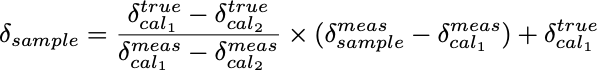

establish a calibration function

In [ ]:
# TODO: write a function that calibrates the data based on the BERMUDA and M54 standards
def calibrate(dsample,iso='d18', dfstd=dfstd):
    ''' dsample: isotope data of the sample
        iso: isotope species (d17 / d18 / dD) given in the "standard dataframe" dfstd
    '''
    m= # slope of calibration function
    c= # intercept of calibration function
    x= # sample isotope data in difference to the BERMUDA standard
    return (m*x+c).round(3) # return linear calibration function and round the result to three digets
    
    

In [ ]:
# TODO: Apply the calibration function to all SPY samples and for the OH sample
# for d18O, d17O and dD and save it to the corresponding variables
dfSPYcali_d18=
dfSPYcali_d17=
dfSPYcali_dD=

dfcali_d18=
dfcali_d17=
dfcali_dD=

In [ ]:
# Print the error of the SPY samples
print('Error d18O: \n',dfSPYcali_d18-dfstd.loc[['M10','M20'],'d18'],'\n-----------------------------------------')
print('Error d17O: \n',dfSPYcali_d17-dfstd.loc[['M10','M20'],'d17'],'\n-----------------------------------------')
print('Error dD: \n',dfSPYcali_dD-dfstd.loc[['M10','M20'],'dD'],'\n-----------------------------------------')


## results of calibrated values:


In [ ]:
# TODO: Print results of calibrated OH samples for d18O, d17O, dD

# Error propagation d-excess

In [ ]:
# TODO: calculate the total error of d-excess with an error of 0.1 for d18O and 1 for dD